#  CNN 추가 실습_이미지분류(cat vs dog)

![](https://www.catsanddogsla.com/uploads/4/7/8/9/47898741/187-4341x2402-300dpi-all-free-download-com-15484942_orig.jpg)

## 1.환경준비

### (1) 사전 준비사항

* 1) 구글 드라이브에 폴더 생성
    * 홈 밑에 **images** 폴더 생성
* 2) 다운받은 파일들을 **images에 복사**해 넣기

### (2) 라이브러리 로딩

In [1]:
import cv2
from google.colab.patches import cv2_imshow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import zipfile
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.backend import clear_session
from keras.optimizers import Adam

* 함수 만들기

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (3) 구글드라이브 마운트

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 구글드라이브 홈 밑에 images 폴더를 생성해야 함!!!
path = '/content/drive/MyDrive/images'

## 2.이미지 전처리

* 이미지를 전처리하는 작업은 꽤 오래 걸리는 작업.
* 아래 절차와 코드가 있지만, 중간 결과물을 이용해 진행해 보도록 하겠음.

### (1) 데이터 둘러보기

* 데이터 목록 읽어오기

In [ ]:
dogs_path = path + '/dogs'
fileList = os.listdir(dogs_path)

* 이미지 파일 둘러보기

In [ ]:
n = rd.randrange(0, len(fileList))
fileList[n]
file_r = dogs_path + '/' + fileList[n]
img = cv2.imread(file_r)
print('이미지 size : ', img.shape)
cv2_imshow(img)

### (2) 이미지 전처리

* 아래 두가지 요건에 맞춰 전처리를 진행.
    * 흑백이미지
    * 150 * 150 크기

* 아래 코드는 시간이 많이 소요되므로 이미 수행한 이미지를 사용.
* 실제 데이터를 가지고 테스트할 때는 전처리를 수행해보게 됨.

#### 1) 파일 크기, 흑백 맞춰서 저장하기

In [ ]:
# # 전처리된 이미지 폴더 생성
# new_path = path + '/cats2'
# os.makedirs(new_path, exist_ok=True)

# path_r = '/content/drive/MyDrive/images/cats'
# fileList = os.listdir(path_r)

# for idx, file in enumerate(fileList) :
#     file_r = path_r + '/' + file
#     img = cv2.imread(file_r, cv2.IMREAD_GRAYSCALE)  # 읽을때, 흑백으로 변환
#     img = cv2.resize(img, (150, 150))               # 크기 맞추기
#     file_w = new_path + '/' + str(idx) + '.jpg'
#     cv2.imwrite(file_w, img)                        # cats2에 저장
#     print(idx)

In [ ]:
# # 전처리된 이미지 폴더 생성
# new_path = path + '/dogs2'
# os.makedirs(new_path, exist_ok=True)

# path_r = '/content/drive/MyDrive/images/dogs'
# fileList = os.listdir(path_r)

# for idx, file in enumerate(fileList) :
#     file_r = path_r + '/' + file
#     img = cv2.imread(file_r, cv2.IMREAD_GRAYSCALE)
#     img = cv2.resize(img, (150, 150))
#     file_w = new_path + '/' + str(idx) + '.jpg'
#     cv2.imwrite(file_w, img)
#     print(idx)

#### 2) 하나의 데이터셋으로 만들기
* 약 2 ~ 5분 소요

In [ ]:
# # cat2
# path = '/content/drive/MyDrive/images/cats2/'
# fileList = os.listdir(path)
# cat_file = len(fileList)

# for idx, file in enumerate(fileList) :
#     file_name = path + '/' + file
#     img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
#     if idx == 0 :
#         x = img.reshape(1,150,150)
#     else :
#         x = np.concatenate((x, img.reshape(1,150,150)), axis=0)

In [ ]:
# # dog2
# path = '/content/drive/MyDrive/images/dogs2/'
# fileList = os.listdir(path)
# dog_file = len(fileList)

# for idx, file in enumerate(fileList) :
#     file_name = path + '/' + file
#     img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
#     x = np.concatenate((x, img.reshape(1,150,150)), axis=0)

# y = np.array([0] * cat_file + [1] * dog_file)
# x.shape, y.shape

### (3) 이미지 데이터셋 업로드
* 이미지 파일이 아닌 데이터셋으로 부터 시작시 아래 코드 실행
    * 제공받은 두 파일을 구글 드라이브에 업로드한 후 아래 코드 실행
        * x_catdog6000.pkl, y_catdog6000.pkl

In [5]:
import joblib # 파이썬으로 만든 오브젝트를 저장하거나 로딩할 수 있는 라이브러리.

# 여러분의 구글 경로
path = "/content/drive/MyDrive/images/"

# 로딩하기
x_filename = path + 'x_catdog6000.pkl'
y_filename = path + 'y_catdog6000.pkl'

x = joblib.load(x_filename)
y = joblib.load(y_filename)

x.shape, y.shape

((6000, 150, 150), (6000,))

* 전처리된 데이터 사진 둘러보기

[[125 131 123 ... 177 182 179]
 [127 129 129 ... 184 184 183]
 [129 125 133 ... 182 177 178]
 ...
 [137 125 139 ... 150 147 148]
 [143 127 138 ... 149 144 145]
 [136 140 135 ... 150 145 147]]


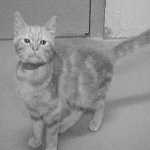

In [12]:
# 아래 숫자(n)을 바꿔봄.
n = 77
print(x[n])
cv2_imshow(x[n])

## 3.모델링

### (1) 데이터 전처리

* 데이터 분할

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size = 2000)
x_train.shape, x_val.shape

((4000, 150, 150), (2000, 150, 150))

* **[중요!]모델 입력(input_shape)에 맞게 차원 조절**

* 기존 : (건수, 가로픽셀, 세로픽셀)
* 조정 :
    * CNN 레이어 input_shape = (가로픽셀, 세로픽셀, 컬러)
    * 그러므로 데이터셋은 **(건수, 가로픽셀, 세로픽셀, 컬러)**


In [14]:
x_train = x_train.reshape(-1, 150, 150, 1)
x_val= x_val.reshape(-1, 150, 150, 1)

In [15]:
# 생성된 데이터셋의 구조(shape)
x_train.shape, x_val.shape

((4000, 150, 150, 1), (2000, 150, 150, 1))

* Scaling : Min-Max
    * 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
    * x_train, x_val를 그냥 255로 나누면 됨

In [16]:
x_train = x_train / 255.
x_val = x_val / 255.

### (2) 모델링
* 아래 구조와 동일하거나 조금 변형해서 모델링을 수행.

In [17]:
clear_session()

model = Sequential([Conv2D(32, kernel_size=3, input_shape=(150, 150, 1), activation='relu'),
                    MaxPooling2D(pool_size=2),
                    Conv2D(64, kernel_size=3, activation='relu'),
                    MaxPooling2D(pool_size=2),
                    Conv2D(128, kernel_size=3, activation='relu'),
                    MaxPooling2D(pool_size=2),
                    Conv2D(256, kernel_size=3, activation='relu'),
                    MaxPooling2D(pool_size=2),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [18]:
# GPU 버전에서 약 2 분이내 소요(GPU를 쓸 수 없다면 1시간 이상 소요ㅜㅜ)
model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy')
history = model.fit(x_train, y_train, epochs = 30, batch_size = 64, validation_split=0.2).history

Epoch 1/30
50/50 [==============================] - 10s 59ms/step - loss: 0.6871 - val_loss: 0.6752
Epoch 2/30
50/50 [==============================] - 2s 48ms/step - loss: 0.6491 - val_loss: 0.6216
Epoch 3/30
50/50 [==============================] - 2s 48ms/step - loss: 0.6108 - val_loss: 0.6110
Epoch 4/30
50/50 [==============================] - 2s 44ms/step - loss: 0.5785 - val_loss: 0.5911
Epoch 5/30
50/50 [==============================] - 2s 44ms/step - loss: 0.5497 - val_loss: 0.5831
Epoch 6/30
50/50 [==============================] - 2s 44ms/step - loss: 0.5315 - val_loss: 0.5691
Epoch 7/30
50/50 [==============================] - 2s 44ms/step - loss: 0.5087 - val_loss: 0.5724
Epoch 8/30
50/50 [==============================] - 2s 48ms/step - loss: 0.4686 - val_loss: 0.5507
Epoch 9/30
50/50 [==============================] - 2s 46ms/step - loss: 0.4386 - val_loss: 0.5186
Epoch 10/30
50/50 [==============================] - 2s 44ms/step - loss: 0.4174 - val_loss: 0.5345
Epoch 11

* 학습결과 그래프

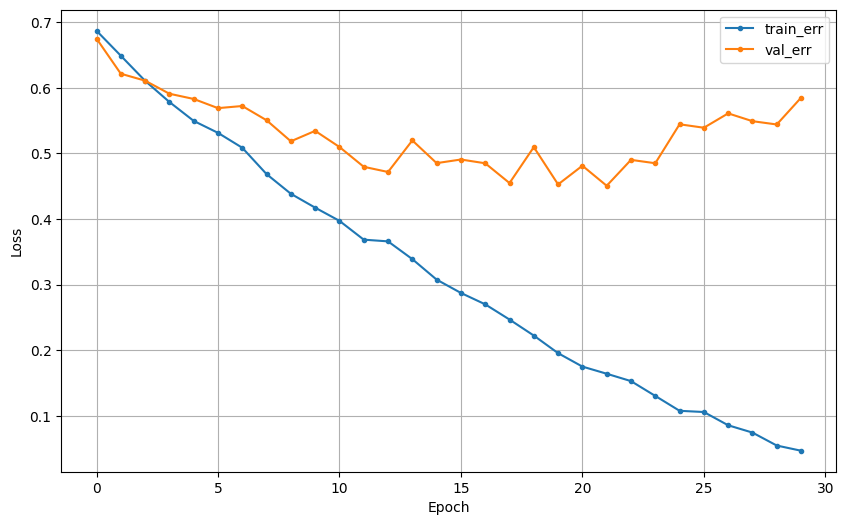

In [19]:
dl_history_plot(history)

### (3) 모델 로딩
* 만약 학습시간이 너무 오래 걸린다면, 아래 코드로 이미 만든 모델 로딩.
* 로딩하는 모델은 더 많은 데이터로 학습

In [ ]:
# model = load_model(path + 'model.h5')

* 예측 및 평가

In [20]:
# 예측
pred = model.predict(x_val)
pred = np.where(pred > 0.5, 1, 0)

# 평가
print(f'Accuracy : {accuracy_score(y_val, pred)}')
print('-' * 60)
print('<< Confusion Matrix >>\n')
print(confusion_matrix(y_val, pred))
print('-' * 60)
print(classification_report(y_val, pred))

63/63 [==============================] - 1s 11ms/step
Accuracy : 0.814
------------------------------------------------------------
<< Confusion Matrix >>

[[807 204]
 [168 821]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1011
           1       0.80      0.83      0.82       989

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



## 4.틀린 이미지 찾아보기
* 아래 코드는 이미지 확인을 위해 실행하는 데에 사용

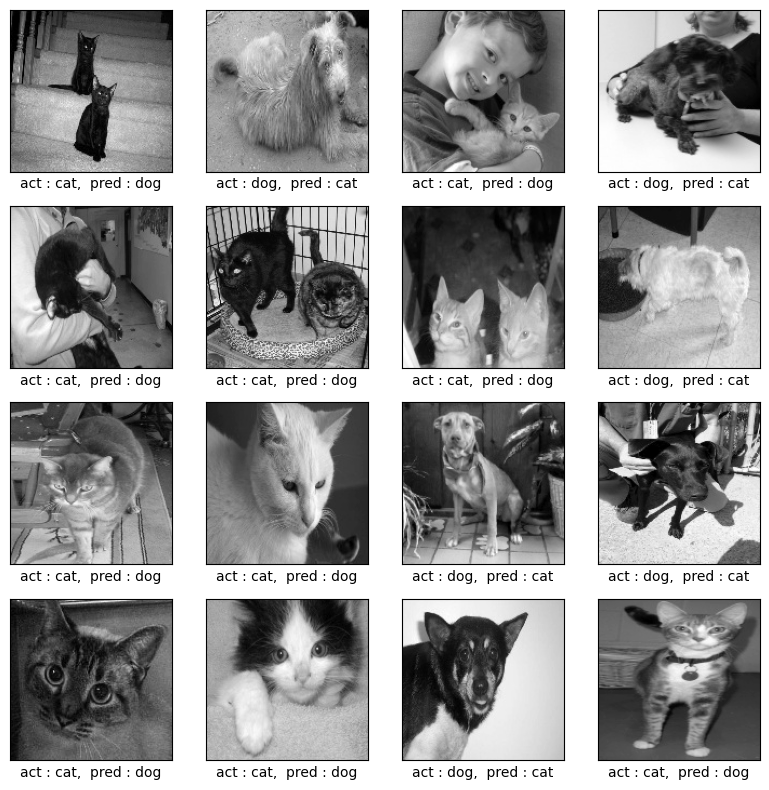

In [21]:
idx = (y_val != pred.reshape(2000,))
x_val_wr = x_val[idx]
y_val_wr = y_val[idx]
pred_wr = pred[idx].reshape(-1,)

x_val_wr = x_val_wr.reshape(-1,150,150)

idx = rd.sample(range(x_val_wr.shape[0]),16)
x_temp = x_val_wr[idx]
y_temp = y_val_wr[idx]
p_temp = pred_wr[idx]
class_name = ['cat','dog']

plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(1-x_temp[i], cmap=plt.cm.binary)
    plt.xlabel(f'act : {class_name[y_temp[i]]},  pred : {class_name[p_temp[i]]}')
plt.tight_layout()
plt.show()

## 5.인터넷에서 이미지를 찾아 테스트

### (1) 이미지 다운받아 구글드라이브에 올리기
* 인터넷에서 고양이/강아지 이미지 몇 개를 다운.
* 콜랩, 왼쪽 탭 중 파일 선택하고
* 이미지를 드래그 & 드롭으로 업로드

### (2) 이미지 전처리

In [23]:
# 아래 file_name을 여러분이 업로드한 파일 이름으로 수정.
file_name = 'cat1.jpg'

# 업로드한 이미지 확인하기
img = cv2.imread(file_name)
print(img.shape)
cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

(150, 150)


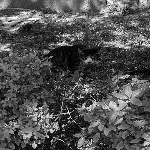

In [24]:
# 이미지 전처리
# 흑백으로 다시 로딩
img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

# 사이즈 조정
img = cv2.resize(img, (150, 150))               # 크기 맞추기
print(img.shape)
cv2_imshow(img)

In [26]:
class_name = ['cat','dog']

# 입력데이터 형식을 갖추기
test_num = img.reshape(1,150,150,1)

# 예측하기(예측된 값이 2차원이어서, 1차원 변환)
test_pred = model.predict(test_num).reshape(-1,)

# 예측결과 0,1 추출 : pred[0]
# float 타입을 int(정수)로 변환 : int(pred[0])
# class 이름으로 변환
class_name[int(test_pred[0])]

1/1 [==============================] - 0s 18ms/step


'dog'